In [159]:
# import library 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [160]:
# hàm z_code để loại bỏ ngoại lệ
def outliers_z_score(data):     
    threshold = 3    
    mean = np.mean(data) 
    std == np.std(data)
    z_scores = [(y - mean) / std for y in data]     
    return np.where(np.abs(z_scores) > threshold)


In [161]:
# import data
dataf = pd.read_csv("data/Life Expectancy Data.csv")
# print(dataf)
dataf.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [162]:
# pre cleaning
dataf = dataf.dropna()
dataf.columns = dataf.columns.str.strip()
# doi ten columns
# dataf.rename(columns={'Life expectancy': 'life_exp','Adult Mortality': 'adul_mor','infant deaths':'infa_dea'  })
# slice data
columnStr = [columnName for (columnName, values) in dataf.dtypes[dataf.dtypes != 'int64'][dataf.dtypes != 'float64'].items()]
columnStr.append('Year')
print(columnStr)
# data type no number
dfStr = pd.DataFrame()
dfNum = dataf.copy(deep = False)
for (columnName, values) in dataf.items():
    if columnName in columnStr:
        dfStr[columnName] = values
        dfNum = dfNum.drop(columnName, axis=1)
dfStr.dropna()
dfNum.dropna()

print(dfStr.shape)
print(dfNum.shape)


['Country', 'Status', 'Year']
(1649, 3)
(1649, 19)


In [163]:
# b1: cleaning data
dataf.isnull().sum()

# replace NaNs in all column with average of this column
for (columnName, columnValues) in dfNum.items():
    dataf[columnName] =  dataf[columnName].fillna( dataf[columnName].mean() )
# print(dataf.isnull().sum())
# Removing Duplicate Row
# dataf.duplicated(keep=False)
dataf.drop_duplicates(keep='first', inplace=True)
print(dataf.shape)
# số hàng ko đổi => ko có hàng nào bị lặp
# chuẩn hóa các cột có giá trị string
for (columnName, values) in dfStr.items():
    dfStr[columnName] = dfStr[columnName].astype('string')
# chuẩn hóa các cột có giá trị số
# num = dfNum.values.astype(float)
# min_max_scaler = preprocessing.MinMaxScaler() 
# x_scaled = min_max_scaler.fit_transform(num) 
# dfNum = pd.DataFrame(x_scaled, columns=dfNum.columns) 
print("dfNum ",dfNum.shape)
print("dfStr ",dfStr.shape)


# print(dfNum)
# loại bỏ ngoại lệ: chưa cần đến

# hợp nhất data:
df = pd.DataFrame()
for(col, vals) in dfStr.items():
    df[col] = vals
for(col, vals) in dfNum.items():
    df[col] = vals
df.dropna()
print(df.shape)

(1649, 22)
dfNum  (1649, 19)
dfStr  (1649, 3)
(1649, 22)


In [164]:
print(type(dfStr))

<class 'pandas.core.frame.DataFrame'>


In [165]:
# SELECT FEATURE
dfCorr = df.corr(numeric_only = True)
# print(type(dfCorr))
# nhan 3 tinh nang hang dau voi moi tuong quan cao nhat voi tuoi th
dfFeature = dfCorr.abs().nlargest(3, 'Life expectancy')
# print(dfFeature.info)
dfFeature

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000,0.702523,0.169074,0.402718,0.409631,0.199935,0.068881,0.542042,0.192265,0.327294,0.174718,0.341331,0.592236,0.441322,0.022305,0.457838,0.457508,0.721083,0.727630
Schooling,0.727630,0.421171,0.214372,0.616975,0.422088,0.215182,0.115660,0.554844,0.226013,0.350147,0.243783,0.350398,0.211840,0.467947,0.040312,0.491199,0.472482,0.784741,1.000000
Income composition of resources,0.721083,0.442203,0.134754,0.561074,0.402170,0.184921,0.058277,0.510505,0.148097,0.314682,0.183653,0.343262,0.248590,0.446856,0.008132,0.453679,0.438484,1.000000,0.784741


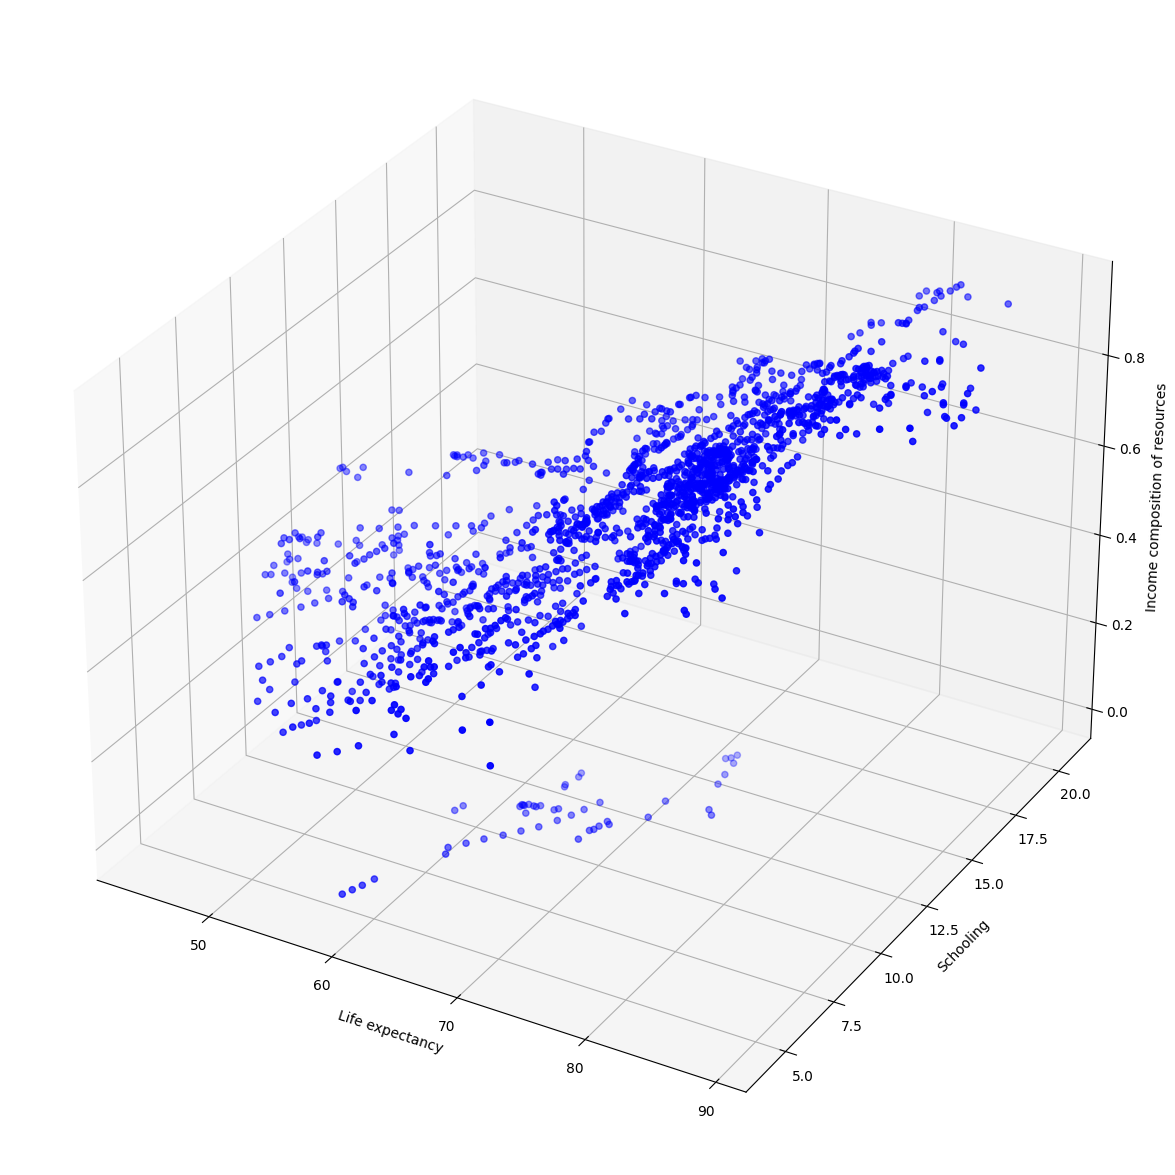

In [166]:
# tao so do
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Life expectancy'],
 df['Schooling'],
 df['Income composition of resources'],
 c='b')
ax.set_xlabel("Life expectancy")
ax.set_ylabel("Schooling")
ax.set_zlabel("Income composition of resources")
plt.show()
df = df.rename(columns={'Life expectancy':'LE', 'Schooling': 'Sch','Income composition of resources':'ICR' })

In [167]:
df.head()

,Country,Year,Status,LE,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,ICR,Sch
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [168]:
# TRAINING DATA
x = pd.DataFrame(np.c_[df['Sch'], df['ICR'] ], columns = ['Sch', 'ICR'])
Y = df['LE']
from sklearn.model_selection import train_test_split
# rate 50:50
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
 random_state=5)


In [169]:
print(x_test.shape)
print(Y_train.shape)
print(x_test.shape)
print(Y_train.shape)

(495, 2)
(1154,)
(495, 2)
(1154,)


In [170]:
x = x.astype(float)
print(x.dtypes)

Sch    float64
ICR    float64
dtype: object


In [171]:
# 1 dung hoi quy tuyen tinh
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, Y_train)


LinearRegression()

In [172]:
# tien hanh du doan
life_pred = model.predict(x_test)
# dung thuat toan R-Squared
print('R-Squared: %.4f' % model.score(x_test,Y_test))

R-Squared: 0.5547


31.843900066140794


Text(0.5, 1.0, 'Actual life vs Predicted life')

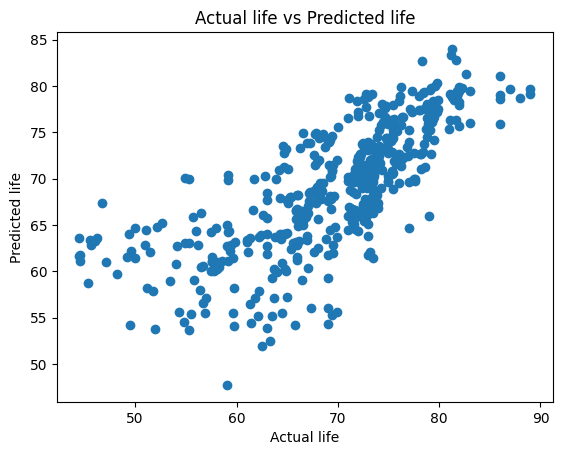

In [173]:
# ve bieu do
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, life_pred)
print(mse)
plt.scatter(Y_test, life_pred)
plt.xlabel("Actual life")
plt.ylabel("Predicted life")
plt.title("Actual life vs Predicted life")

In [174]:
# Getting the Intercept and Coefficients
print(model.intercept_)
print(model.coef_)

40.736797031645246
[ 1.40241806 18.11093586]


In [175]:
# du doan tuoi tho trung binh khi 
# schooling = 6.8 va Income composition of resources = 0.463
print(model.predict([[9.8, 0.463]]))

[62.86585737]


C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


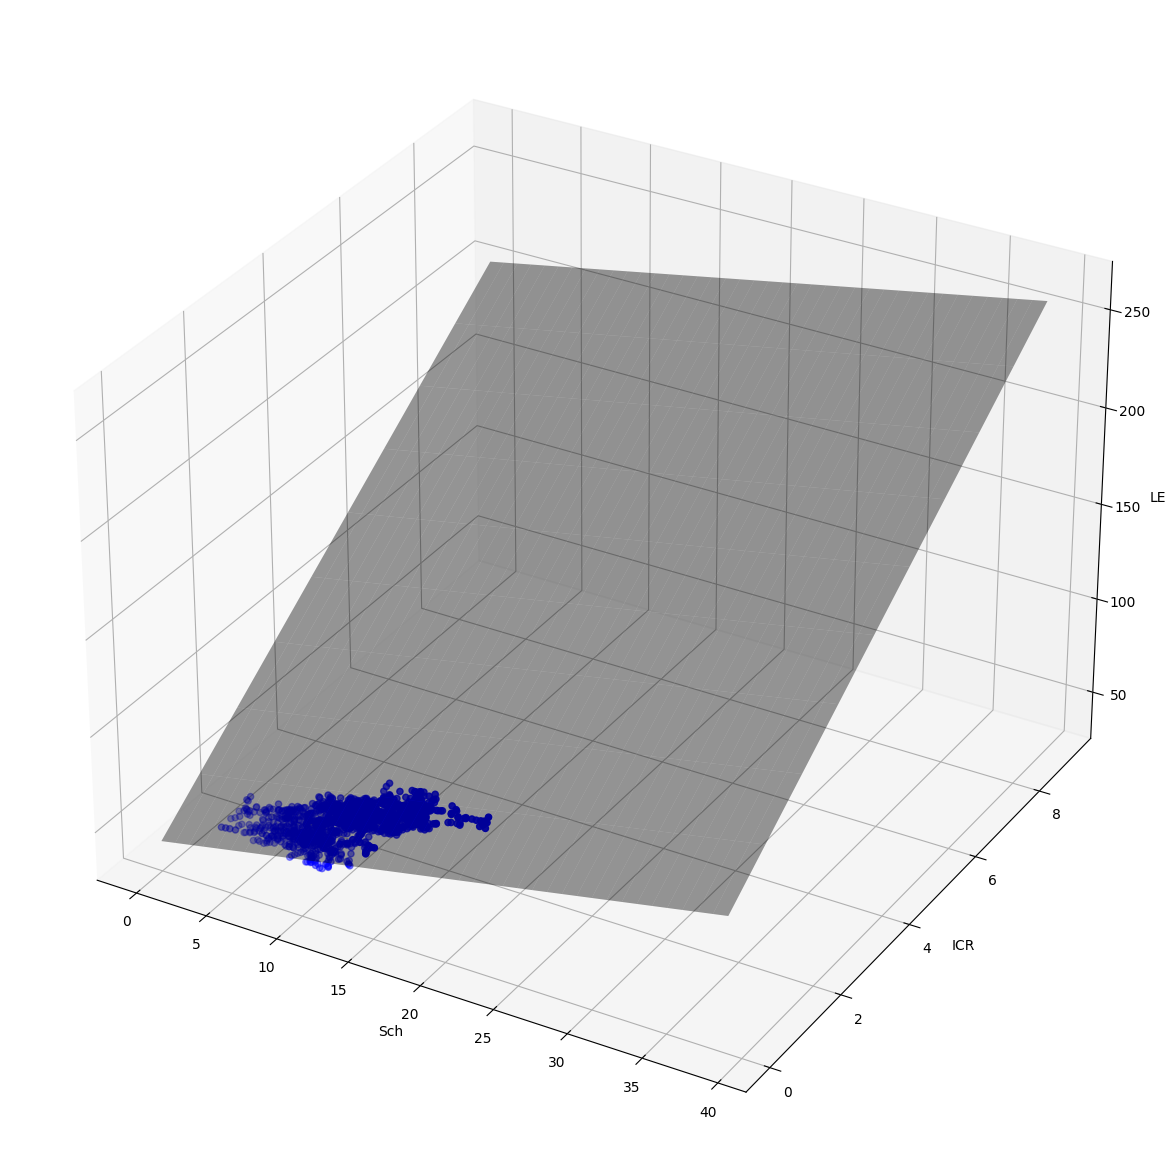

In [176]:
# Plotting the 3D Hyperplane

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['Sch'],
 x['ICR'],
 Y,
 c='b')
ax.set_xlabel("Sch")
ax.set_ylabel("ICR")
ax.set_zlabel("LE")
#---create a meshgrid of all the values for Sch and ICR---
x_surf = np.arange(0, 40, 1) #---for Sch---
y_surf = np.arange(0, 10, 1) #---for ICR---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

#---calculate z(LE) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
 rstride=1,
 cstride=1,
 color='None',
 alpha = 0.4)
plt.show()

In [177]:
# 2 thu dung hoi quy da thuc xem ket qua co tot hon khong
# Polynomial Multiple Regression
from sklearn.preprocessing import PolynomialFeatures 
degree = 2 
polynomial_features = PolynomialFeatures(degree = degree)
x_train_poly = polynomial_features.fit_transform(x_train)
#---print out the formula---
print(polynomial_features.get_feature_names(['x','y']))
model = LinearRegression()
model.fit(x_train_poly, Y_train)



['1', 'x', 'y', 'x^2', 'x y', 'y^2']


C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


LinearRegression()

In [178]:
x_test_poly = polynomial_features.fit_transform(x_test)
print('R-Squared: %.4f' % model.score(x_test_poly,
 Y_test))

R-Squared: 0.7011


In [179]:
print(model.intercept_)
print(model.coef_)


49.81272418068626
[  0.          -0.27588382  10.94795839   0.15743614  -7.09836733
 112.47549847]


C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x', 'y', 'x^2', 'x y', 'y^2']


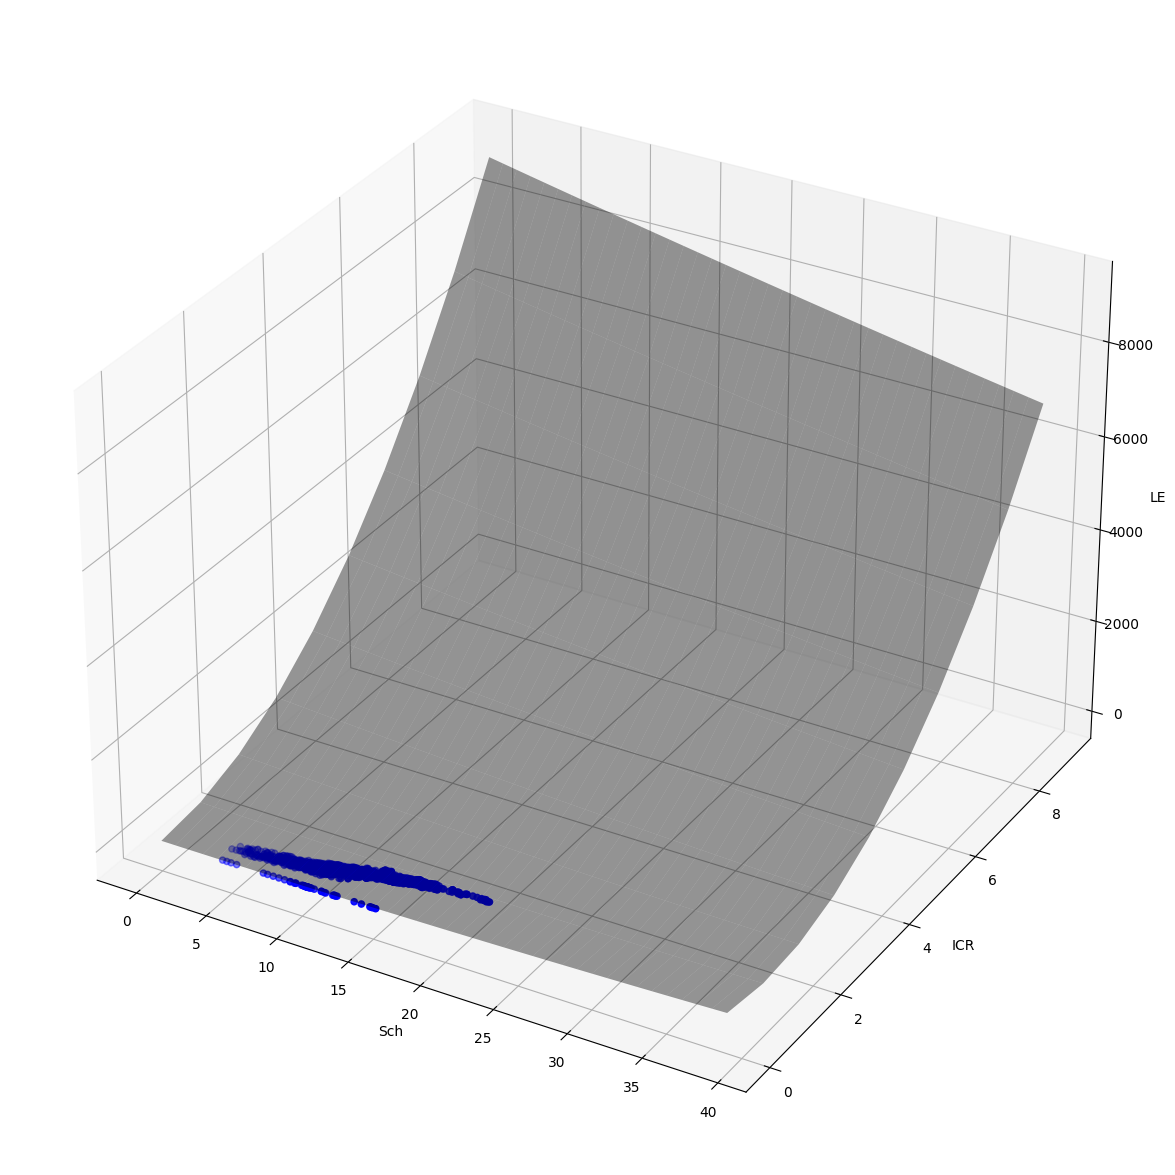

In [180]:
# Plotting the 3D Hyperplane
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['Sch'],
 x['ICR'],
 Y,
 c='b')
ax.set_xlabel("Sch")
ax.set_ylabel("ICR")
ax.set_zlabel("LE")
#---create a meshgrid of all the values for Sch and ICR---
x_surf = np.arange(0, 40, 1) #---for Sch---
y_surf = np.arange(0, 10, 1) #---for ICR---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
#---use a polynomial function of degree 2---
degree = 2
polynomial_features= PolynomialFeatures(degree = degree)
x_poly = polynomial_features.fit_transform(x)
print(polynomial_features.get_feature_names(['x','y']))
#---apply linear regression---
model = LinearRegression()
model.fit(x_poly, Y)
#---calculate z(LE) based on the model---
z = lambda x,y: (model.intercept_ +
 (model.coef_[1] * x) +
 (model.coef_[2] * y) +
 (model.coef_[3] * x**2) +
 (model.coef_[4] * x*y) +
 (model.coef_[5] * y**2))
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
 rstride=1,
 cstride=1,
 color='None',
 alpha = 0.4)
plt.show()